<a href="https://colab.research.google.com/github/blackwithwhitegreen/ML-files/blob/main/Agglomerative_clustering_with_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/country/world-data-2023.csv')

In [3]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [5]:
df.shape

(195, 35)

In [18]:
data = df.iloc[:,4:7].values

In [19]:
data

array([['652,230', '323,000', 32.49],
       ['28,748', '9,000', 11.78],
       ['2,381,741', '317,000', 24.28],
       ['468', nan, 7.2],
       ['1,246,700', '117,000', 40.73],
       ['443', '0', 15.33],
       ['2,780,400', '105,000', 17.02],
       ['29,743', '49,000', 13.99],
       ['7,741,220', '58,000', 12.6],
       ['83,871', '21,000', 9.7],
       ['86,600', '82,000', 14.0],
       ['13,880', '1,000', 13.97],
       ['765', '19,000', 13.99],
       ['148,460', '221,000', 18.18],
       ['430', '1,000', 10.65],
       ['207,600', '155,000', 9.9],
       ['30,528', '32,000', 10.3],
       ['22,966', '2,000', 20.79],
       ['112,622', '12,000', 36.22],
       ['38,394', '6,000', 17.26],
       ['1,098,581', '71,000', 21.75],
       ['51,197', '11,000', 8.11],
       ['581,730', '9,000', 24.82],
       ['8,515,770', '730,000', 13.92],
       ['5,765', '8,000', 14.9],
       ['110,879', '31,000', 8.9],
       ['274,200', '11,000', 37.93],
       ['27,830', '31,000', 39.01],
   

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

#Transformation code

In [50]:
Numvar = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
                      'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
                      'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
                      'Out of pocket health expenditure', 'Physicians per thousand',
                      'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
          'Urban_population']

for vars in Numvar:
  if(df[vars].dtypes == 'object'):
    df[vars] = df[vars].str.replace(',','')
    df[vars] = df[vars].str.replace('%','')
    df[vars] = df[vars].str.replace('$','')
    df[vars] = df[vars].astype(float)

for var in Numvar:
  df[var].fillna(df[var].mean(),inplace = True)

df.sample(10)

<ipython-input-50-81fe3ccf299b>:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
126,Nigeria,226.0,NG,77.7,923768.0,215000.000000,37.910000,234.0,Abuja,120369.0,...,72.2,0.38,200963599.0,52.900000,1.500000,34.800000,8.100000,102806948.0,9.081999,8.675277
26,Burkina Faso,76.0,BF,44.2,274200.0,11000.000000,37.930000,226.0,Ouagadougou,3418.0,...,36.1,0.08,20321378.0,66.400000,15.000000,41.300000,6.260000,6092349.0,12.238333,-1.561593
75,Hungary,107.0,HU,58.4,93028.0,40000.000000,9.600000,36.0,Budapest,45537.0,...,29.0,3.41,9769949.0,56.500000,23.000000,37.900000,3.400000,6999582.0,47.162494,19.503304
181,Tuvalu,393.0,TV,60.0,26.0,159274.853801,20.214974,688.0,Funafuti,11.0,...,0.7,0.92,11646.0,62.738068,16.573964,40.822404,6.886364,7362.0,-7.109535,177.649330
8,Australia,3.0,AU,48.2,7741220.0,58000.000000,12.600000,61.0,Canberra,375908.0,...,19.6,3.68,25766605.0,65.500000,23.000000,47.400000,5.270000,21844756.0,-25.274398,133.775136
12,Bahrain,2239.0,BH,11.1,765.0,19000.000000,13.990000,973.0,Manama,31694.0,...,25.1,0.93,1501635.0,73.400000,4.200000,13.800000,0.710000,1467109.0,26.066700,50.557700
59,Finland,18.0,FI,7.5,338145.0,25000.000000,8.600000,358.0,Helsinki,45871.0,...,19.9,3.81,5520314.0,59.100000,20.800000,36.600000,6.590000,4716888.0,61.924110,25.748151
45,Democratic Republic of the Congo,40.0,CD,11.6,2344858.0,134000.000000,41.180000,243.0,Kinshasa,2021.0,...,37.4,0.07,86790567.0,63.500000,10.700000,50.700000,4.240000,39095679.0,-4.038333,21.758664
68,Guatemala,167.0,GT,36.0,108889.0,43000.000000,24.560000,502.0,Guatemala City,16777.0,...,55.8,0.35,16604026.0,62.300000,10.600000,35.200000,2.460000,8540945.0,15.783471,-90.230759
44,Czech Republic,139.0,CZ,45.2,78867.0,23000.000000,10.700000,420.0,Prague,102218.0,...,14.8,4.12,10669709.0,60.600000,14.900000,46.100000,1.930000,7887156.0,49.817492,15.472962


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 195 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

In [52]:
import scipy.cluster.hierarchy as shc

In [53]:
# plt.figure(figsize=(10,7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(data,method='ward'))

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

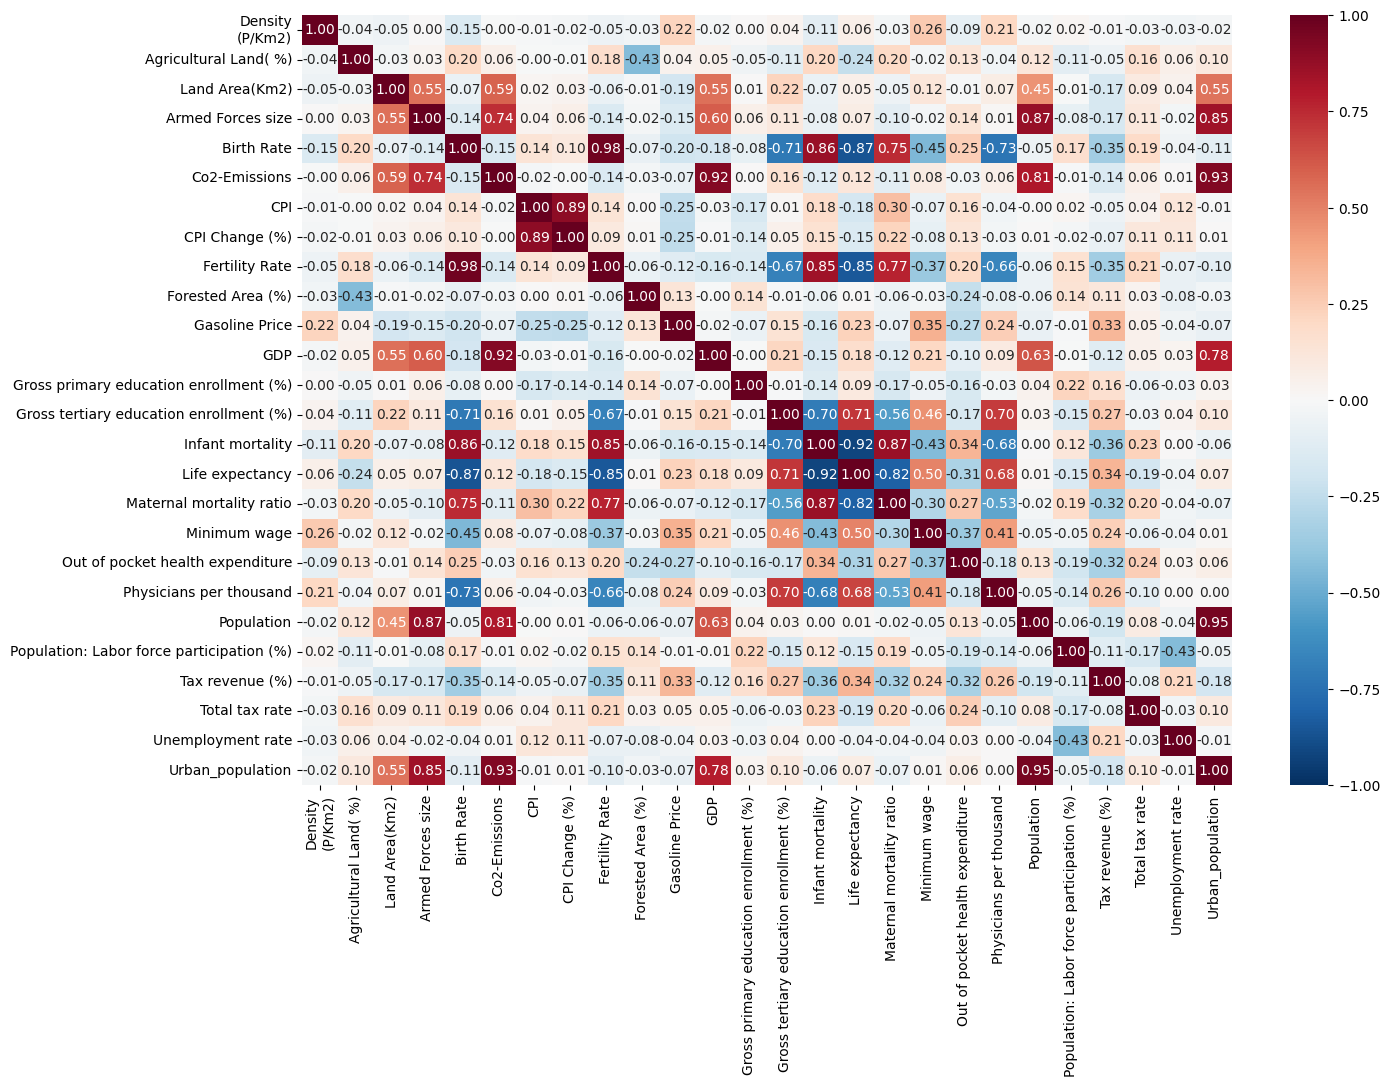

In [55]:
correlationMatrix = df[Numvar].corr()

plt.figure(figsize=(15,10))

mask = np.triu(np.ones_like(correlationMatrix,dtype=bool))

sns.heatmap(correlationMatrix,
            cmap='RdBu_r',
            annot=True,
            fmt='.2f',
            vmin=-1,vmax=1)
plt.show()

In [56]:
clusteringVariables = ['CPI', 'Life expectancy', 'Gross tertiary education enrollment (%)']

GeographicIndicators = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Forested Area (%)']

EconomicIndicators = ['GDP', 'CPI', 'Unemployment rate']

point = df[Numvar]
scaler = MinMaxScaler()
point = scaler.fit_transform(point)
point = pd.DataFrame(point,columns=[Numvar])
point.sample(10)

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
88,0.003493,0.584146,0.033943,0.009568,0.568691,0.001809,0.018169,0.034722,0.423272,0.079349,...,0.296167,0.017673,0.407862,0.017836,0.037614,0.752049,0.405914,0.137996,0.090780,0.017150
188,0.002924,0.759756,0.026166,0.022435,0.433051,0.009279,0.020387,0.042524,0.242833,0.076297,...,0.023519,0.016937,0.522113,0.280618,0.024025,0.555328,0.397849,0.111531,0.207547,0.020085
6,0.000570,0.654878,0.162613,0.034642,0.276755,0.020351,0.029817,0.222994,0.215852,0.099695,...,0.032230,0.245950,0.213759,0.469679,0.032151,0.477459,0.271505,0.464556,0.345319,0.049036
159,0.000873,0.040244,0.001690,0.052549,0.660528,0.000016,0.007588,0.022762,0.576728,0.792472,...,0.088850,0.028719,0.038084,0.021403,0.000479,0.938525,0.793011,0.113422,0.017444,0.000186
98,0.008961,0.385366,0.000009,0.052549,0.099552,0.000004,0.020387,0.042524,0.077572,0.438454,...,0.137972,0.160835,0.398492,0.217579,0.000027,0.506928,0.445537,0.064272,0.241950,0.000000
24,0.003076,0.025610,0.000337,0.002639,0.223992,0.000774,0.000000,0.015046,0.146712,0.733469,...,0.025261,0.160835,0.071253,0.190250,0.000309,0.547131,0.445537,0.000000,0.321467,0.000394
189,0.000873,0.179268,0.000713,0.052549,0.589846,0.000014,0.004036,0.027392,0.472175,0.367243,...,0.060976,0.114138,0.106880,0.019025,0.000214,0.653689,0.478495,0.002363,0.153079,0.000084
82,0.015113,0.292683,0.001215,0.058726,0.370831,0.006586,0.002034,0.019676,0.355818,0.078332,...,0.000871,0.557437,0.297297,0.548157,0.006477,0.532787,0.620968,0.081758,0.134211,0.009928
116,0.003076,0.828049,0.026117,0.081161,0.324540,0.006193,0.002685,0.017361,0.242833,0.128179,...,0.059233,0.117084,0.649877,0.085612,0.026407,0.149590,0.588710,0.178639,0.317907,0.027250
126,0.008506,0.940244,0.054027,0.070934,0.796665,0.012166,0.037568,0.060571,0.743676,0.073245,...,0.797038,0.039028,0.884521,0.043995,0.143780,0.305328,0.040323,0.126654,0.285155,0.121958


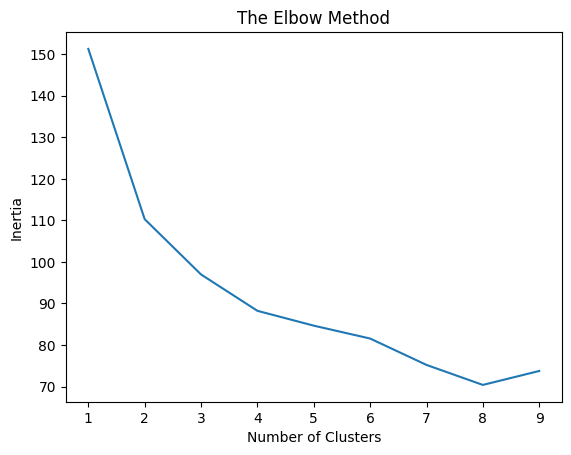

In [57]:
IntList = []
numofrange = range(1,10)

for i in range(1,10):
  clusteringModel = KMeans(n_clusters=i)
  point_cleaned = point.dropna()  # This creates a new DataFrame without NaN values
  clusteringModel.fit(point_cleaned)  # Fit the model to the cleaned data
  IntList.append(clusteringModel.inertia_)


plt.plot(range(1,10),IntList)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [58]:
import plotly.express as px

In [65]:
KMeansCluster = KMeans(n_clusters=4)

KMeansCluster.fit(point)

clusterAssignments = pd.DataFrame({'Country':df.Country,'Cluster'
:KMeansCluster.labels_})

fig = px.choropleth(clusterAssignments,
                    locations = 'Country',
                    locationmode ='country names',
                    color='Cluster',
                    hover_name = 'Country',
                    title = 'Clusters',
                    color_continuous_scale='YlGnBu',
                    width = 1000,
                    height = 600)

fig.show()